In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading
df = pd.read_csv('/content/bankruptcy-prevention (1).csv',delimiter=';')
df.head()
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
# Display column names again to verify
print(df.columns)

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')


In [4]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display column names again to verify
print(df.columns)

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')


**Exploratory Data Analysis**

In [5]:
# Display basic information about the dataset
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


In [6]:
# Get basic statistics
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [8]:
# Check for duplicates
numeric_df = df.drop(columns=['class'])
duplicate_rows = numeric_df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 147


In [9]:
# Keep the first occurrence of each duplicate
df = df.drop_duplicates(keep='first')

# Check the number of rows after removing duplicates
print("\nData shape after removing duplicates:", df.shape)


Data shape after removing duplicates: (103, 7)


In [10]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [11]:
# Identify Outliers
numeric_df = df.drop(columns=['class'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers:\n", outliers)


Outliers:
 industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
dtype: int64


**Exploring through Visualizations**

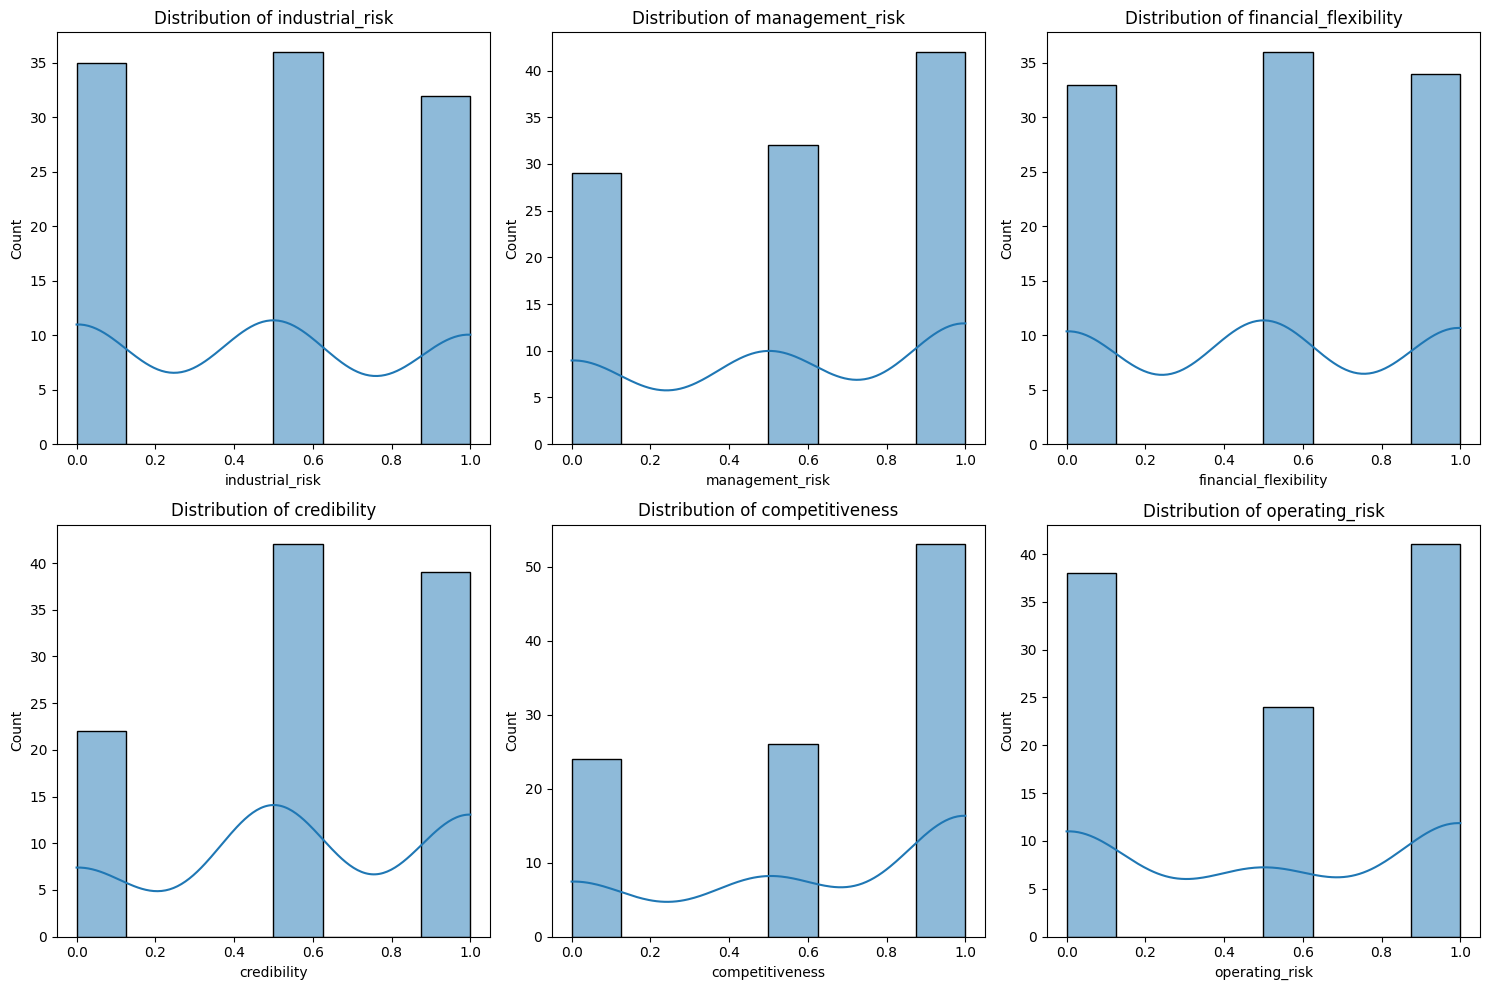

In [12]:
# Visualize feature distributions / Univariate analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [13]:
# Check the distribution of the target variable
class_distribution = df['class'].value_counts()
class_distribution

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

<ipython-input-14-851d4147c8be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


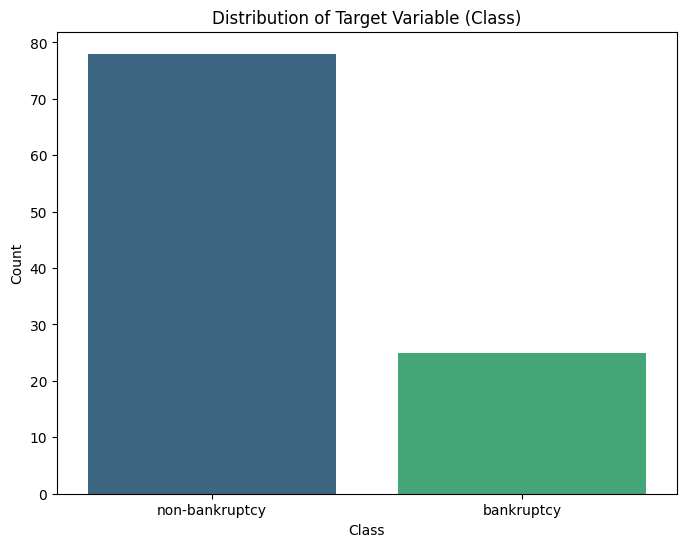

In [14]:
# Visualize the distribution of the target variable / Univariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

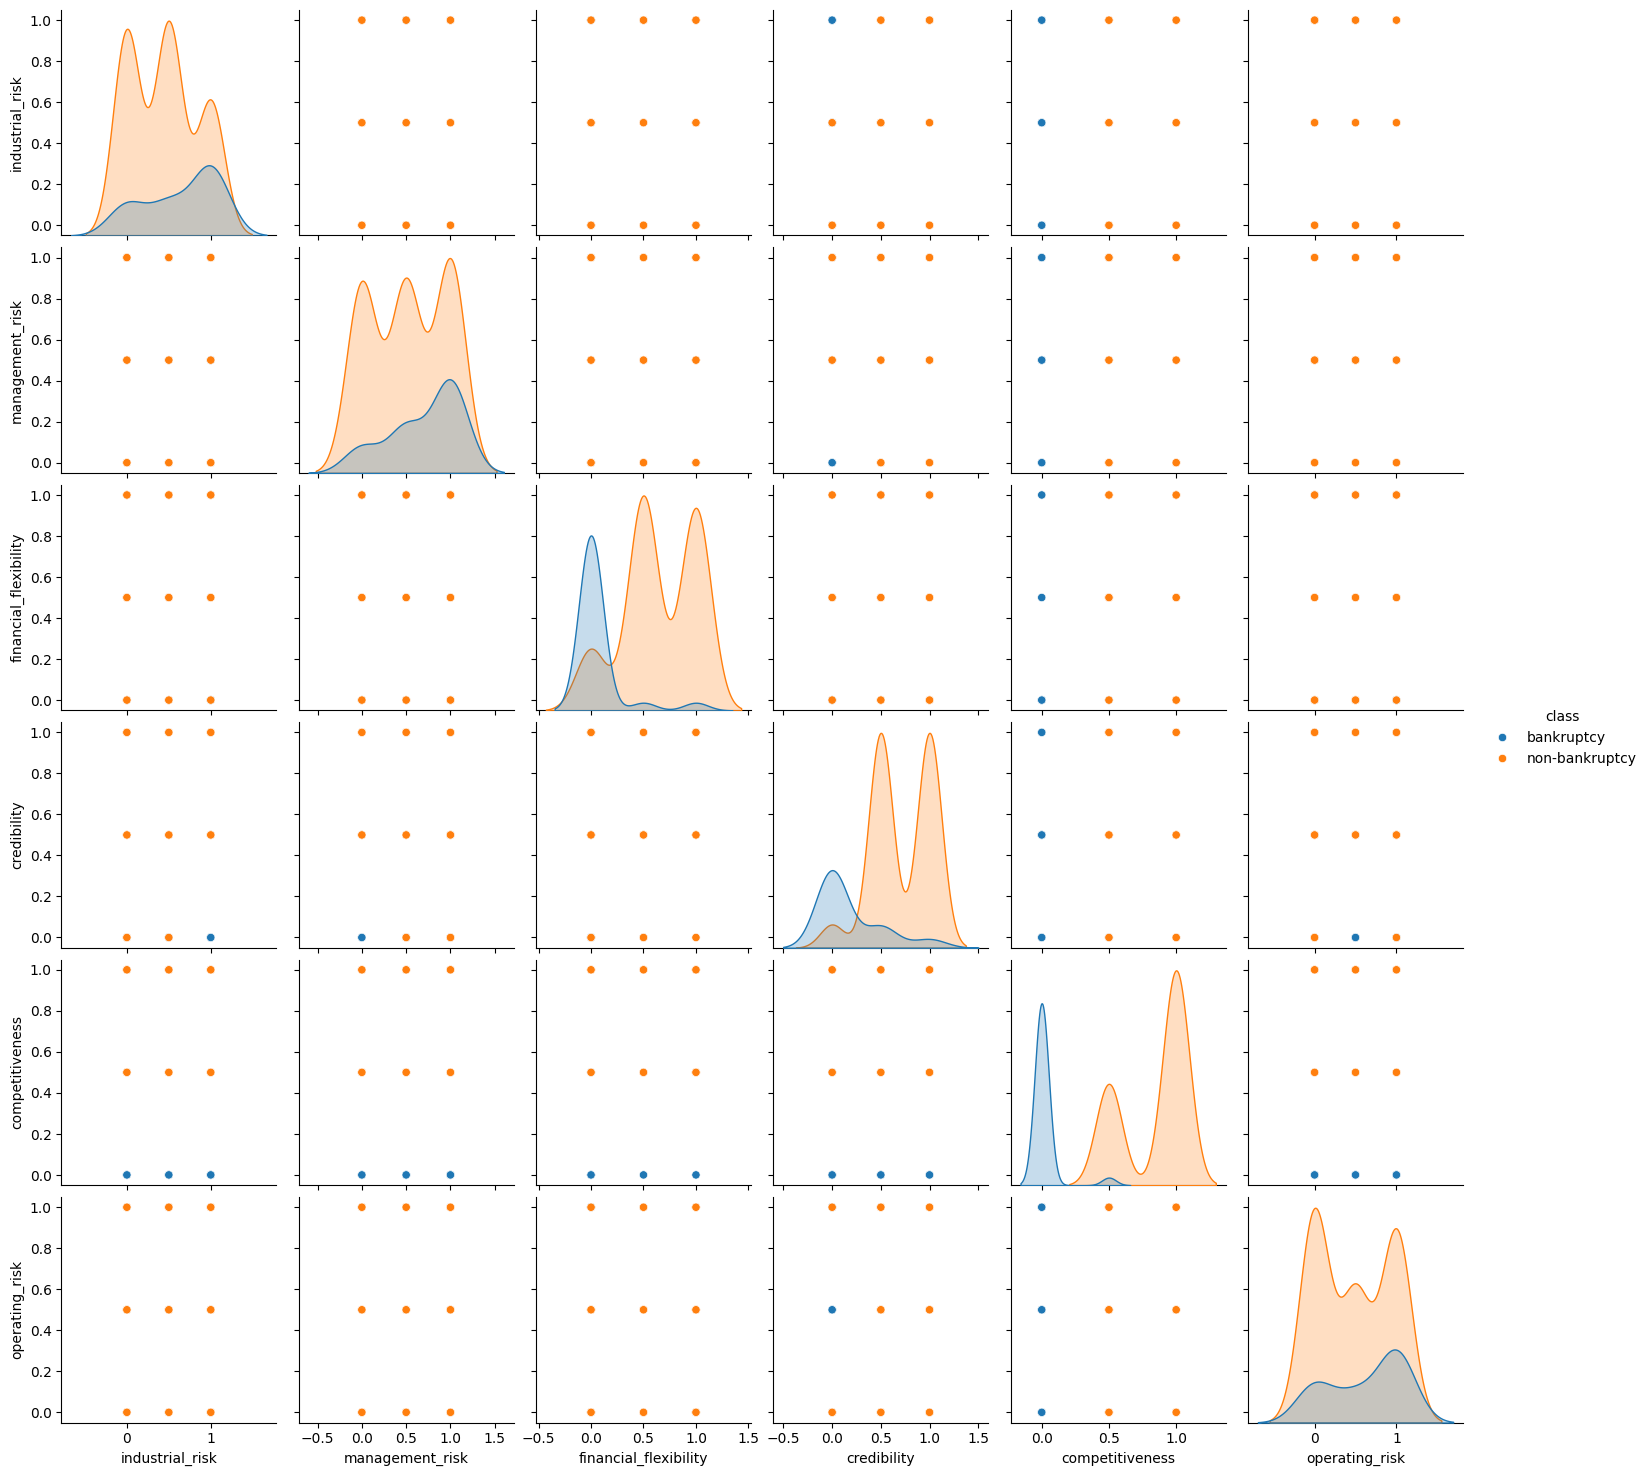

In [15]:
# Pairplot to visualize relationships between features / Bivariate Analysis
sns.pairplot(df, hue='class')
plt.show()

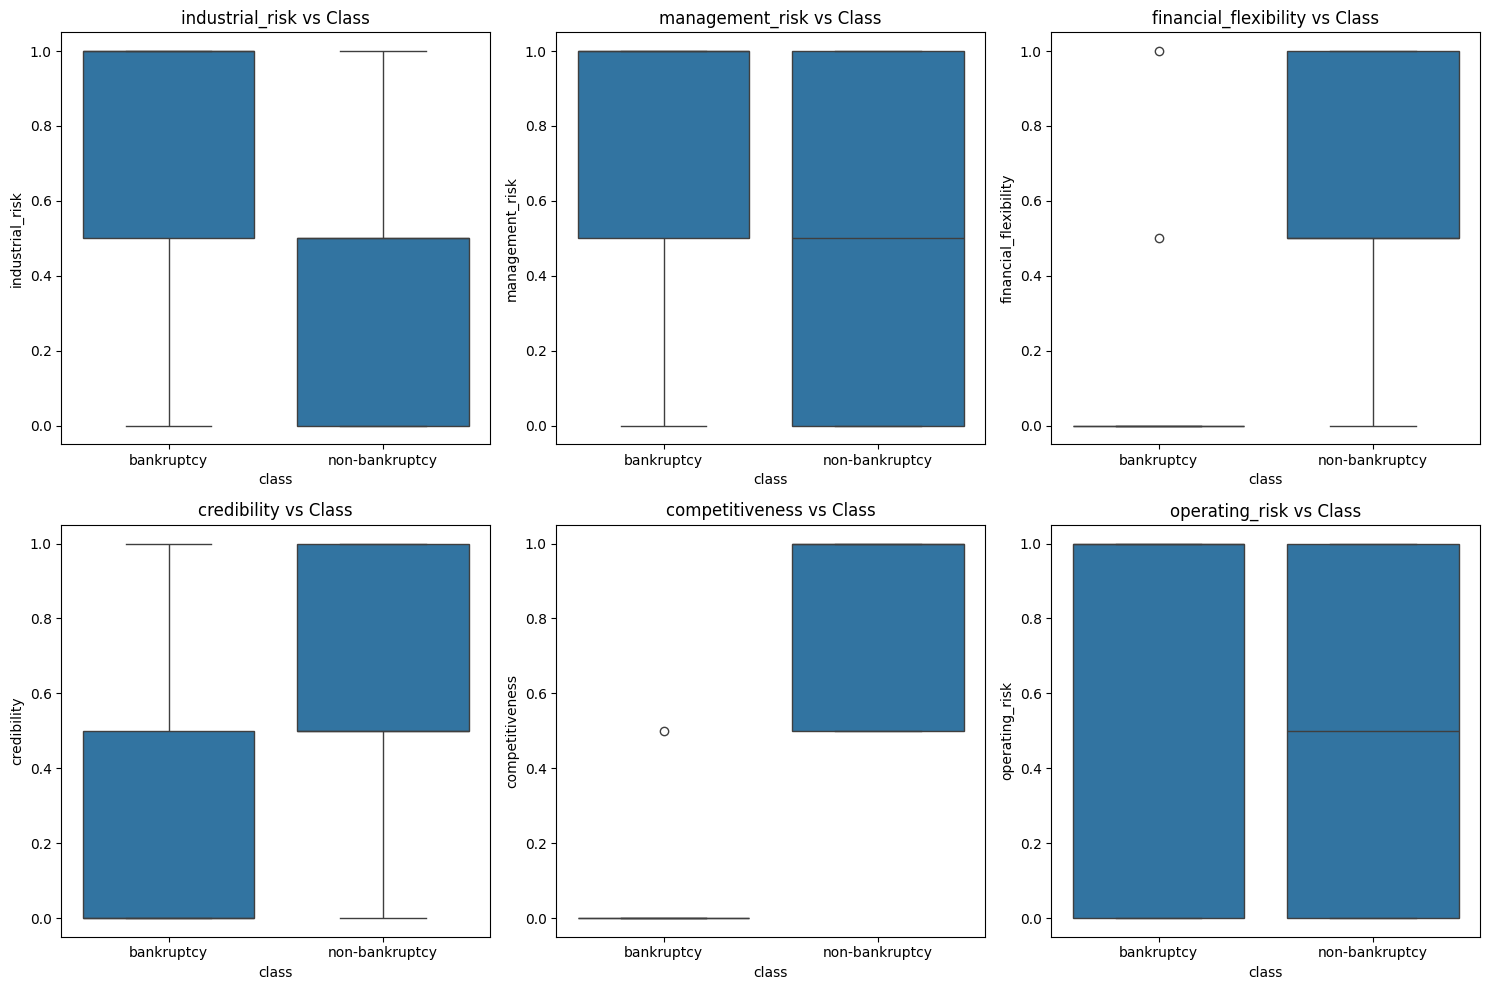

In [16]:
# Boxplots to visualize feature differences by class / Bivariate Analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()

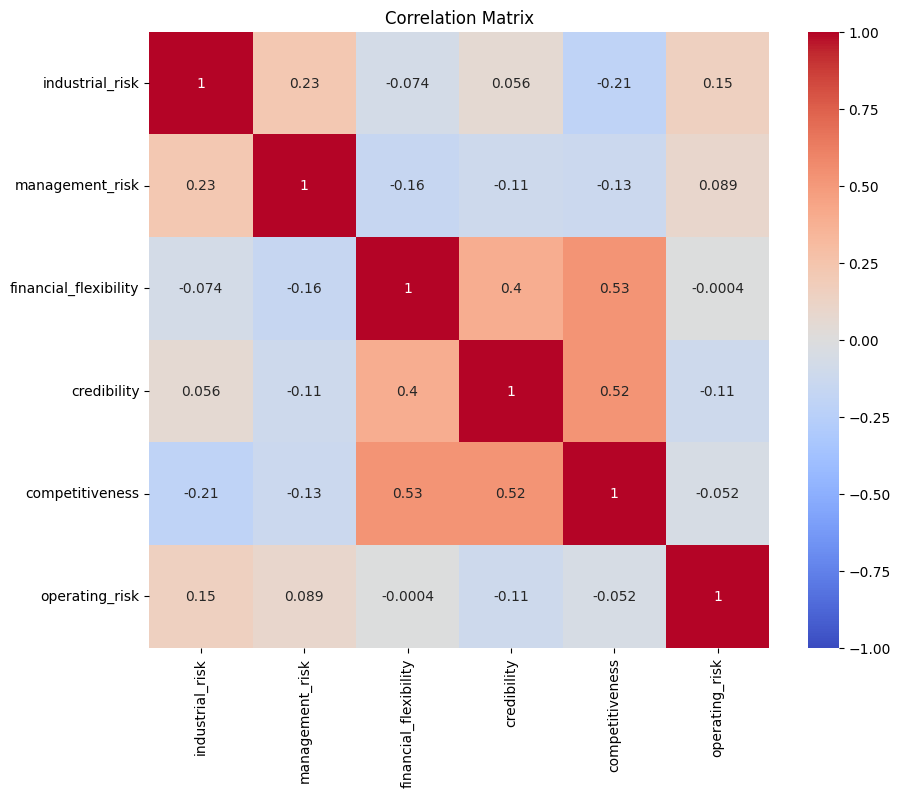

In [17]:
# Correlation analysis / Multivariate Analysis
numeric_df = df.drop(columns=['class'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

##Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
df.shape

(103, 7)

In [20]:
x=df.iloc[:,:-1]
y=df['class']

In [21]:
x.head()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [22]:
y.tail()

185    non-bankruptcy
187    non-bankruptcy
190    non-bankruptcy
192    non-bankruptcy
194    non-bankruptcy
Name: class, dtype: object

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
x_test.shape,x_train.shape

((31, 6), (72, 6))

In [24]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.9609090909090909


In [25]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9727272727272727


In [26]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.909090909090909


In [27]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9727272727272727


In [28]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9809090909090911


In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Assuming you have a variable named 'seed' defined somewhere in your code
seed = 42  # Replace with your actual seed value

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier( n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.990909090909091


In [30]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:-1]
Y = array[:,-1]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.990909090909091


In [31]:
# Voting Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9818181818181818


In [32]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  # Added RandomForestClassifier

array = df.values
X = array[:,0:-1]
Y = array[:,-1]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))  # Added RandomForestClassifier

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.972727 (0.058210)
KNN: 0.981818 (0.036364)
CART: 0.950909 (0.091742)
NB: 0.972727 (0.058210)
SVM: 0.972727 (0.058210)
Random Forest: 0.980909 (0.038236)


In [33]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [34]:
df['class'].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('/content/bankruptcy-prevention (1).csv',delimiter=';')




In [30]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [31]:
df.rename(columns={' class': 'class'}, inplace=True)

In [24]:
df['class']

0          bankruptcy
1          bankruptcy
2          bankruptcy
3          bankruptcy
4          bankruptcy
            ...      
245    non-bankruptcy
246    non-bankruptcy
247    non-bankruptcy
248    non-bankruptcy
249    non-bankruptcy
Name: class, Length: 250, dtype: object

In [34]:
df['y_numeric'] = df['class'].apply(lambda x: 1 if x == 'bankruptcy' else 0)

In [42]:
df.drop('class', axis=1, inplace=True)

In [50]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,y_numeric
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


In [51]:
# Separate features and target variable
X = df.drop('y_numeric', axis=1)
y = df['y_numeric']



In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: y_numeric, Length: 250, dtype: int64

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a KNN classifier on the resampled dataset
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[28  1]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [56]:
# Pickle the trained model
import pickle
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_clf, model_file)

print("Model has been pickled and saved as 'knn_model.pkl'")

Model has been pickled and saved as 'knn_model.pkl'


In [49]:
array = df.values
array

array([[0.5, 1. , 0. , ..., 0. , 0.5, 1. ],
       [0. , 1. , 0. , ..., 0. , 1. , 1. ],
       [1. , 0. , 0. , ..., 0. , 1. , 1. ],
       ...,
       [0. , 1. , 1. , ..., 0.5, 0. , 0. ],
       [1. , 0. , 0.5, ..., 0.5, 0. , 0. ],
       [1. , 0. , 0.5, ..., 1. , 1. , 0. ]])

In [34]:
from sklearn.neighbors import KNeighborsClassifier
array = df.values
X = array[:,0:-1]
Y = array[:,-1]


In [35]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


array = df.values
X = array[:,0:-1]
Y = array[:,-1]

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X,Y)



KNeighborsClassifier(n_neighbors=3)

In [36]:

kfold = KFold(n_splits=10)
results = cross_val_score(knn_model, X, Y, cv=kfold,scoring='accuracy')
print(results.mean())


0.9818181818181818


In [37]:
knn_model

KNeighborsClassifier(n_neighbors=3)

In [38]:
'''
import pickle
# Save the model to a file using pickle
filename = 'knnmodel1.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knn_model, file)

print(f'Model saved to {filename}')
'''

Model saved to knnmodel1.pkl
